In [350]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("C:/Users/DEBASHISH THAKUR/Documents/Scispace/Scispace/dataset.csv")
df.head(10)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5  01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6  01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   
7  01.01.2009 01:20:00    996.50     -7.62    265.81        -8.36    94.4   
8  01.01.2009 01:30:00    996.50     -7.91    265.52        -8.73    93.8   
9  01.01.2009 01:40:00    996.53     -8.43    264.99        -9.34    93.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   
5          3.33          3.14          0.19       1.96             3.15   
6          3.44          3.26          0.18       2.04             3.27   
7          3.44          3.25          0.19       2.03             3.26   
8          3.36          3.15          0.21       1.97             3.16   
9          3.23          3.00          0.22       1.88             3.02   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3  
5       1307.86      0.21           0.63     192.7  
6       1305.68      0.18           0.63     166.5  
7       1305.69      0.19           0.50     118.6  
8       1307.17      0.28           0.75     188.5  
9       1309.85      0.59           0.88     185.0

In [351]:
df.size

6308265

In [352]:
df.shape

(420551, 15)

In [353]:
#configuring the figure size
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['axes.grid'] = False

In [354]:
#start set to 5th row 1st Jan 2009 2 AM
#stop set to don't stop
#step set to 12 for 2 hours interval
#Data sampling by taking the data points of every 2 hours
df1 = df[11::12]
df1

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
11      01.01.2009 02:00:00    996.62     -8.88    264.54        -9.77   
23      01.01.2009 04:00:00    996.99     -9.05    264.34       -10.02   
35      01.01.2009 06:00:00    997.71     -9.67    263.66       -10.62   
47      01.01.2009 08:00:00    999.17     -8.10    265.12        -9.05   
59      01.01.2009 10:00:00   1000.27     -7.04    266.10        -8.17   
...                     ...       ...       ...       ...          ...   
420491  31.12.2016 14:10:00   1003.25      4.15    277.05        -3.76   
420503  31.12.2016 16:10:00   1002.54      2.44    275.40        -4.39   
420515  31.12.2016 18:10:00   1002.27     -0.42    272.56        -4.92   
420527  31.12.2016 20:10:00   1001.40     -1.40    271.66        -6.84   
420539  31.12.2016 22:10:00   1000.65     -2.89    270.22        -7.15   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
11       93.20          3.12          2.90          0.21       1.81   
23       92.60          3.07          2.85          0.23       1.78   
35       92.70          2.93          2.71          0.21       1.69   
47       92.80          3.31          3.07          0.24       1.92   
59       91.60          3.60          3.30          0.30       2.05   
...        ...           ...           ...           ...        ...   
420491   56.20          8.22          4.62          3.60       2.87   
420503   60.50          7.28          4.41          2.88       2.74   
420515   71.50          5.92          4.23          1.69       2.63   
420527   66.29          5.51          3.65          1.86       2.27   
420539   72.30          4.93          3.57          1.37       2.22   

        H2OC (mmol/mol)  rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
11                 2.91       1312.25      0.25           0.63     190.3  
23                 2.85       1313.61      0.10           0.38     240.0  
35                 2.72       1317.71      0.05           0.50     146.0  
47                 3.08       1311.65      0.72           1.25     213.9  
59                 3.29       1307.76      1.45           3.00     292.6  
...                 ...           ...       ...            ...       ...  
420491             4.61       1258.09      0.58           1.32     231.0  
420503             4.40       1265.12      0.46           1.08     177.2  
420515             4.22       1278.14      0.44           1.00     232.8  
420527             3.65       1281.87      1.02           1.92     225.4  
420539             3.57       1288.03      0.35           0.68     216.7  

[35045 rows x 15 columns]

In [355]:
date_time = pd.to_datetime(df1.pop('Date Time'), format="%d.%m.%Y %H:%M:%S")

In [356]:
df1

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11        996.62     -8.88    264.54        -9.77   93.20          3.12   
23        996.99     -9.05    264.34       -10.02   92.60          3.07   
35        997.71     -9.67    263.66       -10.62   92.70          2.93   
47        999.17     -8.10    265.12        -9.05   92.80          3.31   
59       1000.27     -7.04    266.10        -8.17   91.60          3.60   
...          ...       ...       ...          ...     ...           ...   
420491   1003.25      4.15    277.05        -3.76   56.20          8.22   
420503   1002.54      2.44    275.40        -4.39   60.50          7.28   
420515   1002.27     -0.42    272.56        -4.92   71.50          5.92   
420527   1001.40     -1.40    271.66        -6.84   66.29          5.51   
420539   1000.65     -2.89    270.22        -7.15   72.30          4.93   

        VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11              2.90          0.21       1.81             2.91       1312.25   
23              2.85          0.23       1.78             2.85       1313.61   
35              2.71          0.21       1.69             2.72       1317.71   
47              3.07          0.24       1.92             3.08       1311.65   
59              3.30          0.30       2.05             3.29       1307.76   
...              ...           ...        ...              ...           ...   
420491          4.62          3.60       2.87             4.61       1258.09   
420503          4.41          2.88       2.74             4.40       1265.12   
420515          4.23          1.69       2.63             4.22       1278.14   
420527          3.65          1.86       2.27             3.65       1281.87   
420539          3.57          1.37       2.22             3.57       1288.03   

        wv (m/s)  max. wv (m/s)  wd (deg)  
11          0.25           0.63     190.3  
23          0.10           0.38     240.0  
35          0.05           0.50     146.0  
47          0.72           1.25     213.9  
59          1.45           3.00     292.6  
...          ...            ...       ...  
420491      0.58           1.32     231.0  
420503      0.46           1.08     177.2  
420515      0.44           1.00     232.8  
420527      1.02           1.92     225.4  
420539      0.35           0.68     216.7  

[35045 rows x 14 columns]

In [357]:
plot_cols = ['T (degC)','p (mbar)']
plot_features = df[plot_cols]
#change in temperature throughout 8 years [2009-2016] inclusive
fig = px.line(df1, x=date_time,y='T (degC)')
fig.show()
#data sampling from 0 to 4379 to extract the data for one specific year only
#change in relative humidity throughout the year 2009
fig = px.line(df1, x=date_time[:4379],y=df1["rh (%)"][:4379])
fig.show()


C:\Users\DEBASHISH THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



C:\Users\DEBASHISH THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [358]:
df_monthly_2019 = df1[:4320:360]
df_monthly_2019

p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
11       996.62     -8.88    264.54        -9.77   93.20          3.12   
4331     996.77     -2.47    270.94        -3.65   91.60          5.09   
8651     984.20      4.41    278.84         2.33   86.30          8.38   
12971    994.12      0.79    274.41        -1.24   86.20          6.47   
17291    992.82     10.11    283.85         7.86   85.90         12.38   
21611    995.76     11.69    285.20        10.84   94.50         13.76   
25931    992.71     14.08    287.84        12.88   92.50         16.09   
30251    986.93     15.26    289.51        10.94   75.40         17.37   
34571    988.25     15.73    289.87         7.26   57.03         17.90   
38891    997.26      8.01    281.39         7.37   95.70         10.75   
43211    995.45      8.63    282.16         7.44   92.20         11.21   
47531    981.12      6.93    281.62         2.57   73.70          9.98   

       VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
11             2.90          0.21       1.81             2.91       1312.25   
4331           4.66          0.43       2.91             4.68       1280.53   
8651           7.23          1.15       4.58             7.34       1231.77   
12971          5.57          0.89       3.50             5.61       1261.48   
17291         10.64          1.75       6.69            10.72       1216.01   
21611         13.00          0.76       8.16            13.06       1211.76   
25931         14.89          1.21       9.38            14.99       1197.12   
30251         13.09          4.27       8.29            13.27       1186.06   
34571         10.21          7.69       6.45            10.33       1187.04   
38891         10.28          0.46       6.44            10.31       1230.75   
43211         10.33          0.87       6.48            10.38       1225.79   
47531          7.35          2.62       4.67             7.49       1216.82   

       wv (m/s)  max. wv (m/s)  wd (deg)  
11         0.25           0.63    190.30  
4331       1.91           2.75     36.99  
8651       2.33           3.88    154.10  
12971      0.16           0.50    118.90  
17291      1.53           3.13    280.10  
21611      1.48           2.25     28.85  
25931      1.08           1.38    229.30  
30251      0.62           0.88    211.60  
34571      2.00           2.50    250.80  
38891      0.02           0.50    271.10  
43211      0.79           1.24    235.90  
47531      4.35           5.61    201.00

In [359]:
df_mean = df_monthly_2019['T (degC)'].mean()

In [360]:
df_mean

7.024166666666666

In [361]:
#the change in temperature throughout the year 2009
fig = px.line(df1, x=date_time[:4320:360],y=df_monthly_2019['T (degC)'])
fig.show()

C:\Users\DEBASHISH THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



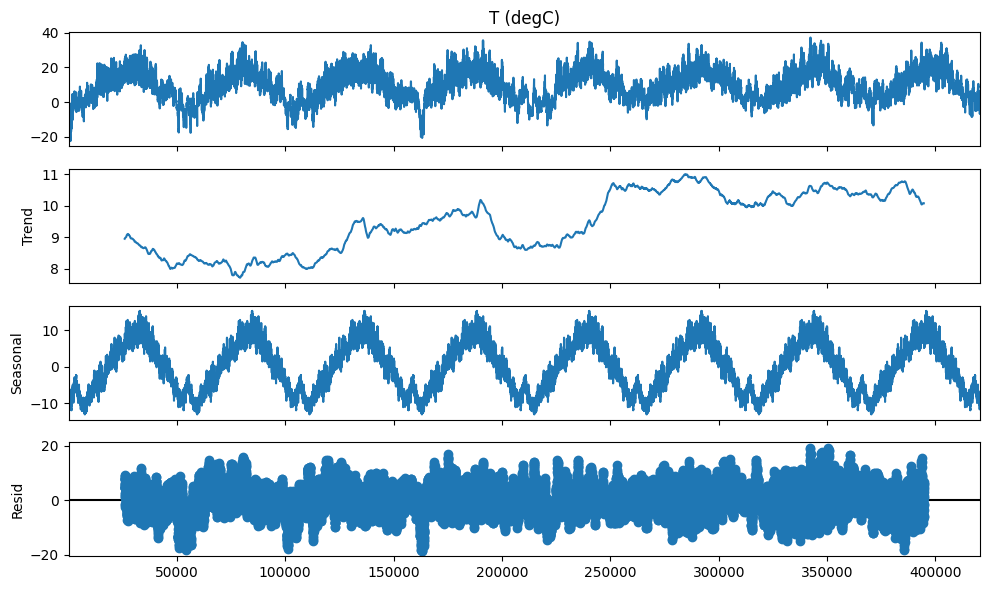

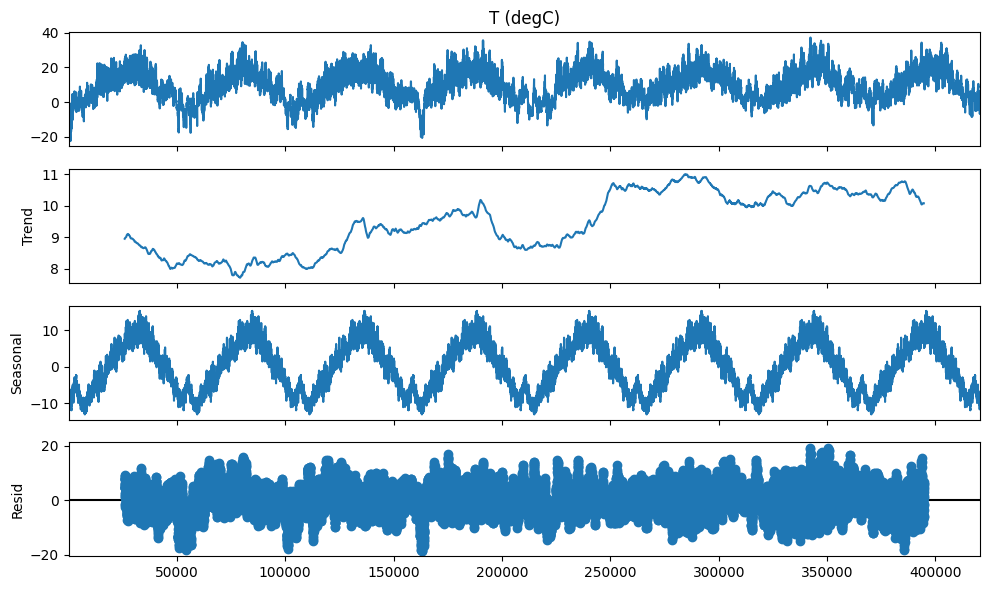

In [362]:
#decomposing the temperature data into annual trends and seasonality
#period is set for 12 months --> 12*12*30 hours
decompose = seasonal_decompose(df1['T (degC)'],model='additive', period=12*12*30)
decompose.plot()

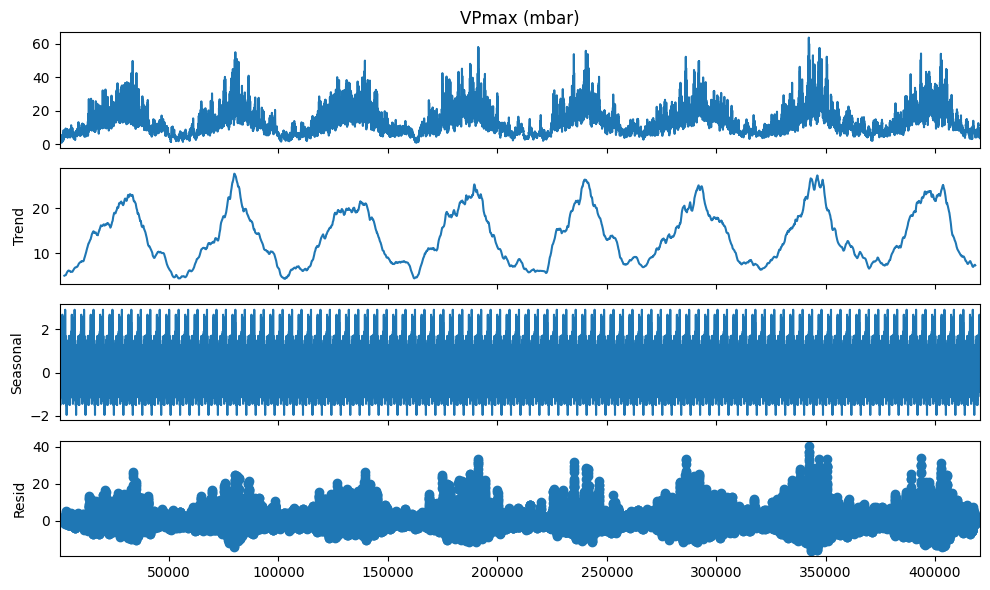

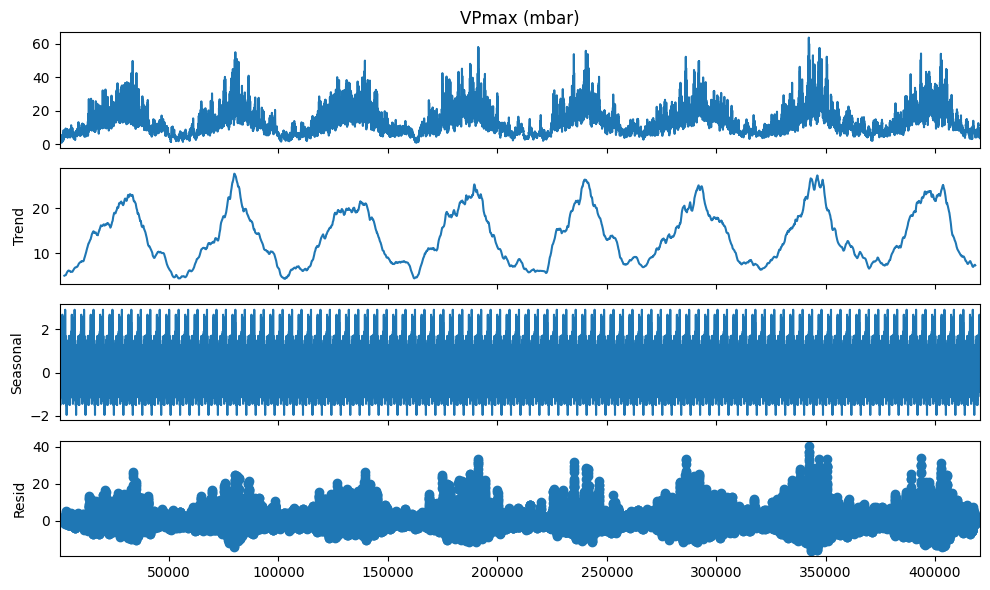

In [363]:
decompose = seasonal_decompose(df1['VPmax (mbar)'],model='additive', period=360)
decompose.plot()

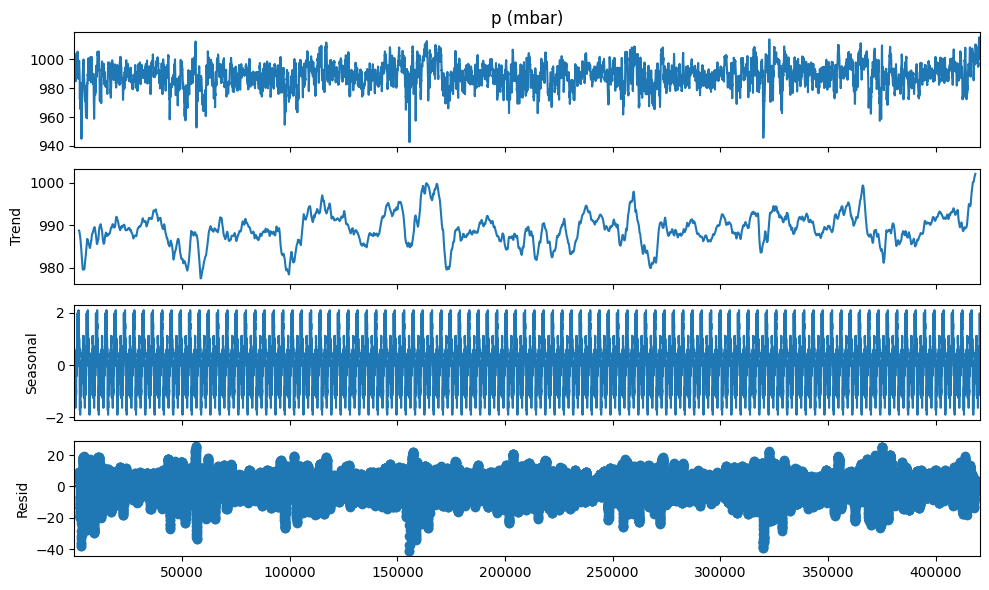

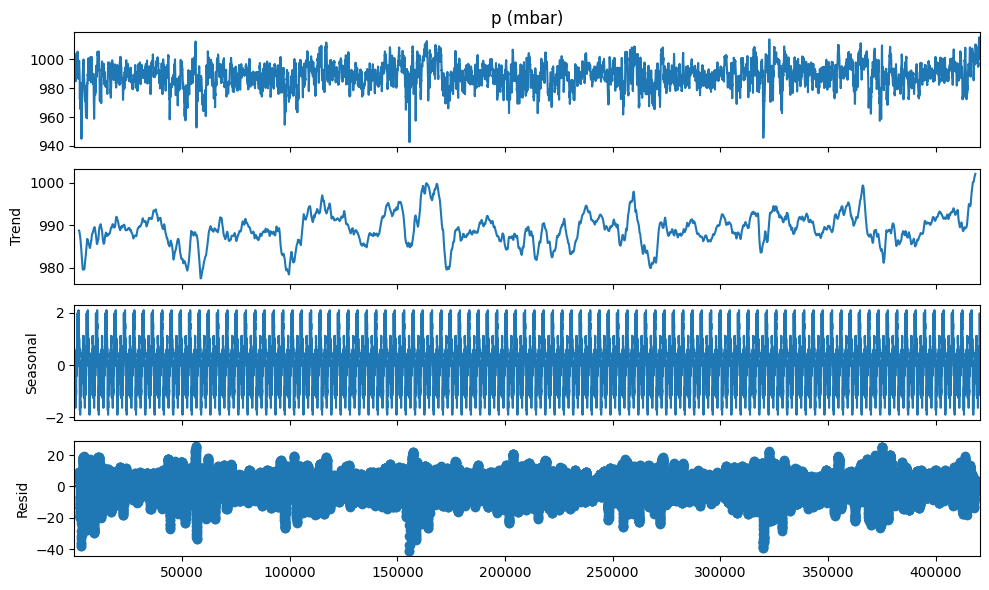

In [364]:
decompose = seasonal_decompose(df1['p (mbar)'],model='additive', period=360)
decompose.plot()

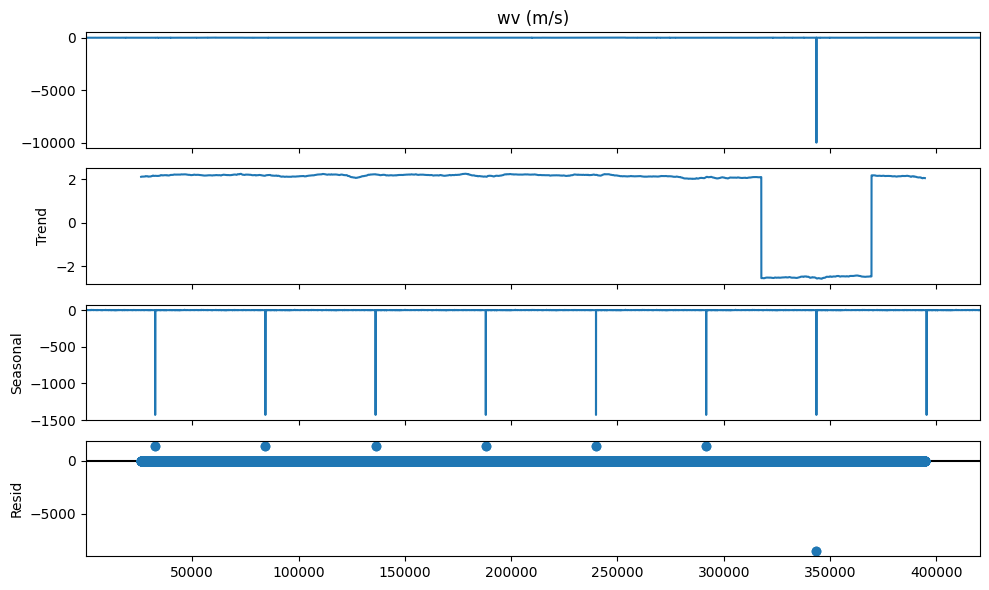

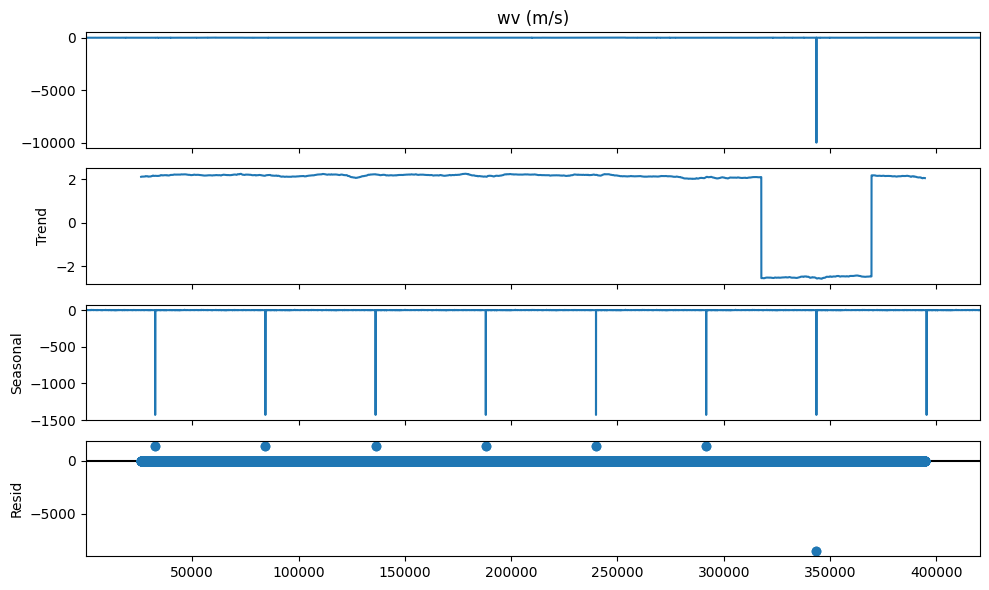

In [365]:
decompose = seasonal_decompose(df1['wv (m/s)'],model='additive', period=4320)
decompose.plot()

In [366]:
#anomaly detected in wv
df1.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     1.558001  75.567534 -9999.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [367]:
df1.isnull().sum()

p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [368]:
df1.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     1.558001  75.567534 -9999.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

In [369]:
wv = df1['wv (m/s)']
bad_wv = wv == -9999.00
wv[bad_wv] = 0.0


C:\Users\DEBASHISH THAKUR\AppData\Local\Temp\ipykernel_1676\1281693887.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [370]:
df1.describe().transpose()

count         mean        std      min      25%      50%  \
p (mbar)         35045.0   989.213079   8.353850   942.65   984.20   989.57   
T (degC)         35045.0     9.450335   8.425301   -22.50     3.36     9.43   
Tpot (K)         35045.0   283.492908   8.506133   251.22   277.44   283.48   
Tdew (degC)      35045.0     4.955012   6.729168   -24.55     0.24     5.22   
rh (%)           35045.0    76.006020  16.483440    13.88    65.15    79.30   
VPmax (mbar)     35045.0    13.577314   7.743076     0.99     7.77    11.83   
VPact (mbar)     35045.0     9.532714   4.181965     0.83     6.22     8.86   
VPdef (mbar)     35045.0     4.044542   4.902793     0.00     0.87     2.18   
sh (g/kg)        35045.0     6.021744   2.654692     0.52     3.92     5.60   
H2OC (mmol/mol)  35045.0     9.639148   4.233082     0.83     6.29     8.97   
rho (g/m**3)     35045.0  1216.063165  39.978039  1102.46  1187.47  1213.82   
wv (m/s)         35045.0     2.128639   1.542289     0.00     0.99     1.76   
max. wv (m/s)    35045.0     2.961995  75.598740 -9999.00     1.76     2.96   
wd (deg)         35045.0   174.660533  86.707469     0.00   125.20   198.10   

                     75%      max  
p (mbar)          994.72  1015.16  
T (degC)           15.49    37.28  
Tpot (K)          289.55   311.21  
Tdew (degC)        10.08    22.19  
rh (%)             89.50   100.00  
VPmax (mbar)       17.62    63.77  
VPact (mbar)       12.36    26.79  
VPdef (mbar)        5.30    46.01  
sh (g/kg)           7.81    17.13  
H2OC (mmol/mol)    12.49    27.25  
rho (g/m**3)     1242.80  1391.41  
wv (m/s)            2.84    13.50  
max. wv (m/s)       4.73    23.50  
wd (deg)          233.60   360.00

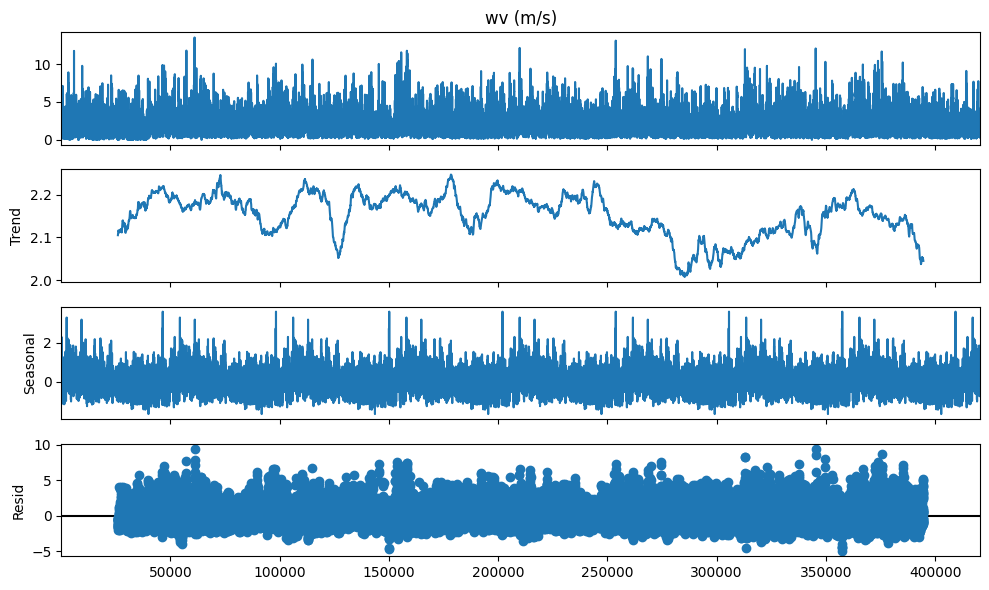

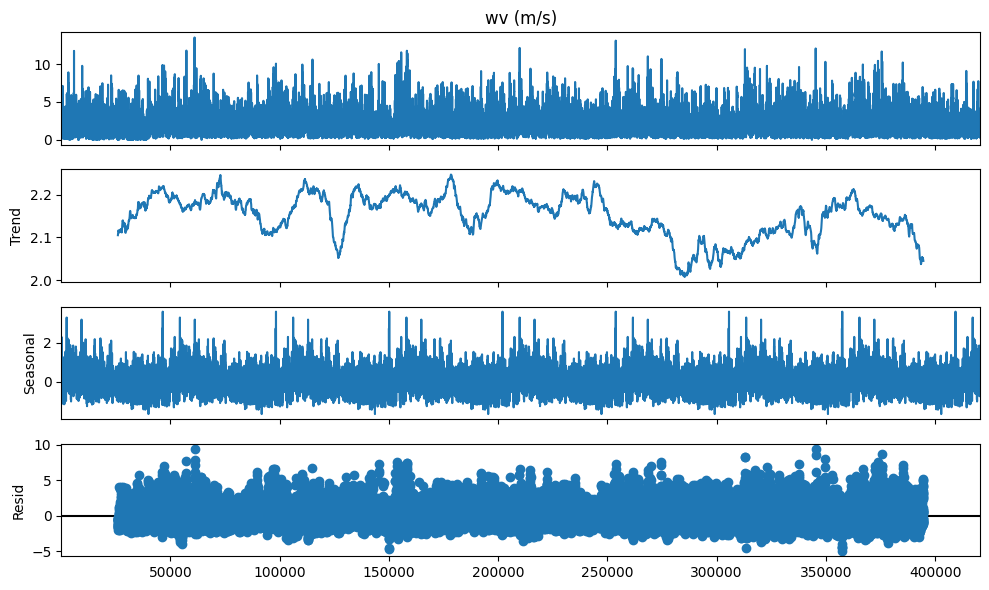

In [371]:
#plotting the trend of wind velocity after correcting the anamolies
decompose = seasonal_decompose(df1['wv (m/s)'],model='additive', period=4320)
decompose.plot()

In [372]:
fig = px.line(df1, x=date_time[:4379],y=df1["wv (m/s)"][:4379])
fig.show()

C:\Users\DEBASHISH THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [373]:
fig = px.line(df1, x=date_time[:4379],y=df1["wd (deg)"][:4379])
fig.show()

C:\Users\DEBASHISH THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



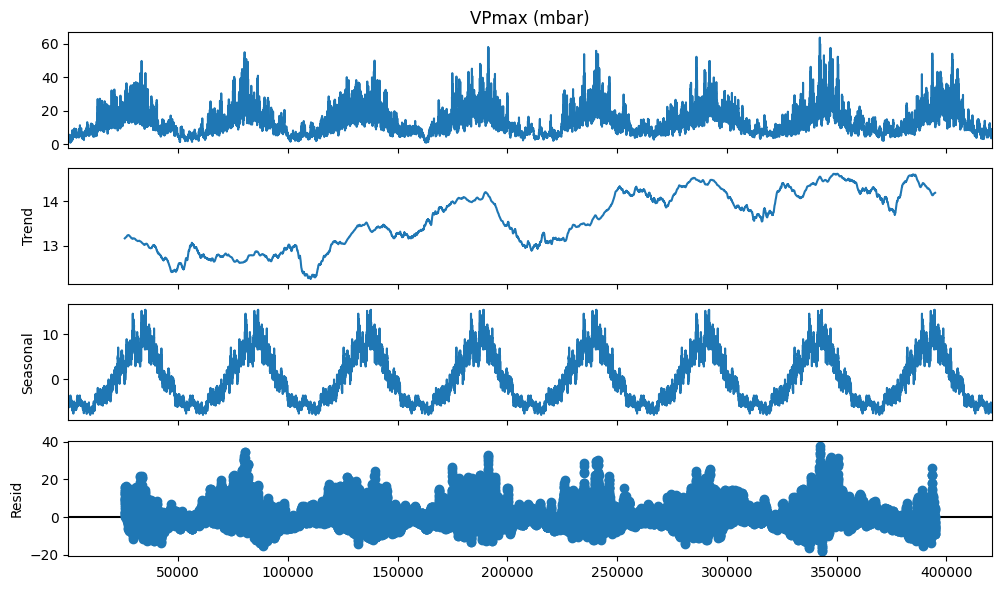

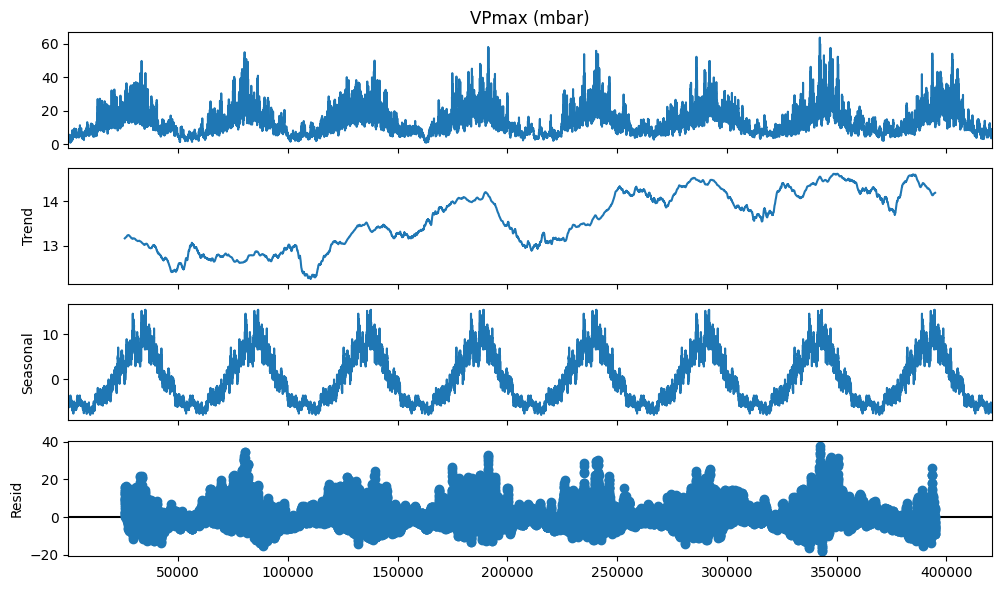

In [374]:
decompose = seasonal_decompose(df1['VPmax (mbar)'],model='additive', period=4280)
decompose.plot()

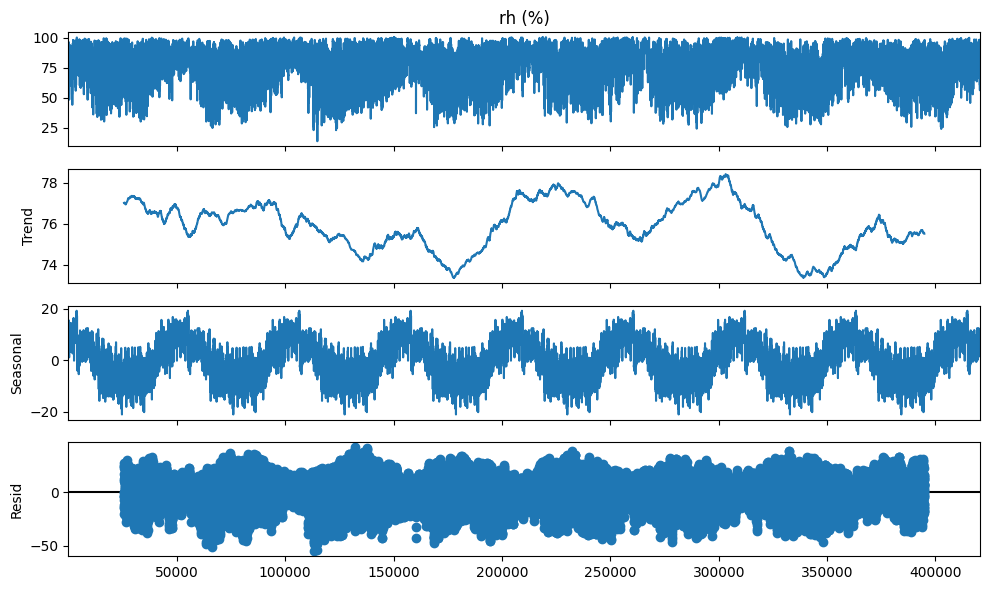

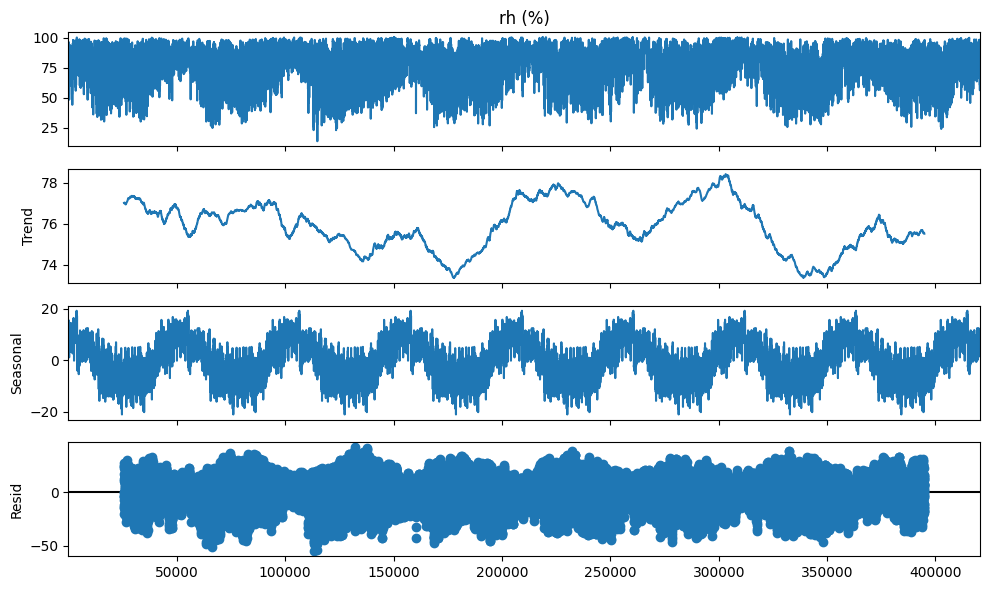

In [375]:
decompose = seasonal_decompose(df1['rh (%)'],model='additive', period=4280)
decompose.plot()

In [376]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format="%d.%m.%Y %H:%M:%S")
daily_average = df.resample('D', on='Date Time').mean().reset_index()
daily_average['wv (m/s)']

0       0.778601
1       1.419514
2       1.250903
3       1.720417
4       3.800278
          ...   
2918    2.558194
2919    0.837986
2920    1.138125
2921    0.803403
2922    1.230000
Name: wv (m/s), Length: 2923, dtype: float64

In [378]:
fig = px.line(daily_average, x='Date Time', y=daily_average['wv (m/s)'], title='Daily Wind Speed')
fig.show()

C:\Users\DEBASHISH THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<function numpy.array>